/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


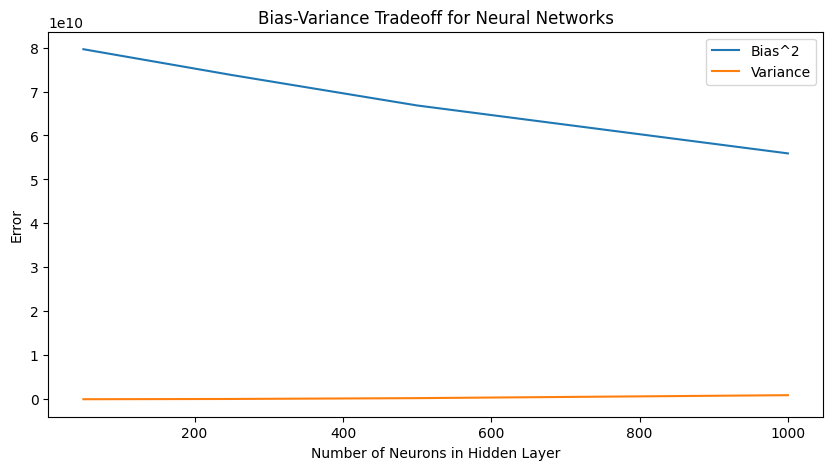

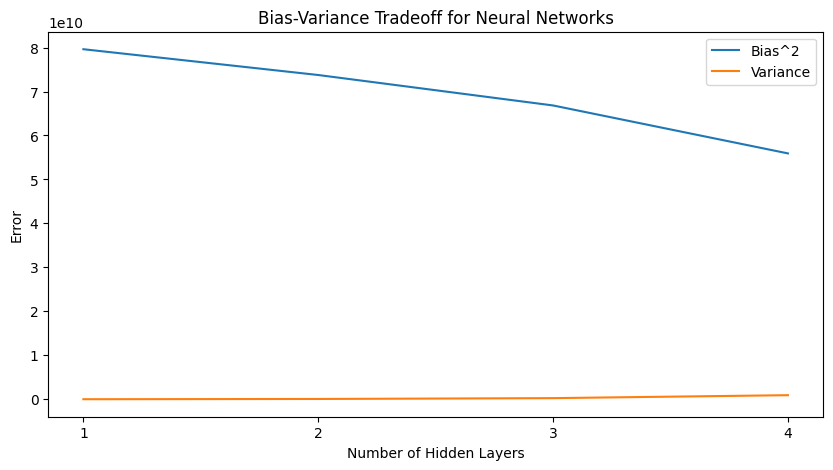

   Hidden Layer Size   MSE (Train)    MSE (Test)
0                 50  7.961713e+10  8.508854e+10
1                250  7.375113e+10  7.883896e+10
2                500  6.682427e+10  7.150008e+10
3               1000  5.592024e+10  5.985539e+10


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Define the true polynomial function
def true_function(x):
    a, b, c, d, e, f, g = 1, -1, 2, 1, 4, 2, -2
    return a*x**6 + b*x**5 + c*x**4 + d*x**3 + e*x**2 + f*x + g

# Generate data
N = 1000  # Number of data points
x_values = np.random.uniform(-10, 10, N)
y = true_function(x_values)
noise = np.random.normal(0, 2, N)  # Mean 0, standard deviation 2
y_noisy = y + noise

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_values, y_noisy, test_size=0.2, random_state=42)

# Varying complexity levels (hidden layer sizes)
hidden_layer_sizes = [(50,), (250,), (500,), (1000,)]
biases = []
variances = []
mse_train = []
mse_test = []

# Calculate bias and variance for different complexity levels
for hidden_layer_size in hidden_layer_sizes:
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, random_state=42, max_iter=1000)
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred_train = model.predict(x_train.reshape(-1, 1))
    y_pred_test = model.predict(x_test.reshape(-1, 1))
    bias = np.mean((y_pred_train - y_train) ** 2)
    variance = np.mean(np.var(y_pred_train))
    biases.append(bias)
    variances.append(variance)
    mse_train.append(mean_squared_error(y_train, model.predict(x_train.reshape(-1, 1))))
    mse_test.append(mean_squared_error(y_test, model.predict(x_test.reshape(-1, 1))))

# Plotting bias-variance tradeoff
plt.figure(figsize=(10, 5))
plt.plot([h[0] for h in hidden_layer_sizes], biases, label='Bias^2')
plt.plot([h[0] for h in hidden_layer_sizes], variances, label='Variance')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff for Neural Networks')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(hidden_layer_sizes) + 1), biases, label='Bias^2')
plt.plot(range(1, len(hidden_layer_sizes) + 1), variances, label='Variance')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff for Neural Networks')
plt.xticks(range(1, len(hidden_layer_sizes) + 1))
plt.legend()
plt.show()

# Create a DataFrame to store the results
mse_df = pd.DataFrame({
    'Hidden Layer Size': [h[0] for h in hidden_layer_sizes],
    'MSE (Train)': mse_train,
    'MSE (Test)': mse_test
})

print(mse_df)